(sec-walsh-hadamard)=
# Walsh-Hadamard Transformation

An integer $j$ can be expressed in binary bits $j_{n-1}\,j_{n-2}\,\cdots\,j_{0}$ such that

$$
j = 2^{n-1} j_{n-1} + 2^{n-2} j_{n-2} + \cdots + j_0 = \sum_{k=0}^{n-1} 2^k j_j
$$

where $j_k = \in \{0,1\}$. The smallest and the largest integers expressed with $n$ bits are $0$ and $2^{n}-1$.  We can encode integers in quantum computation in the same way.  Replacing the bits with qubits $j_k$,

$$
|j\rangle_n = |j_{n-1}\,j_{n-2}\,\cdots\,j_{0} \rangle = |j_{n-1} \rangle \otimes  |j_{n-2} \rangle \otimes \cdots \otimes |j_{0}\rangle = \underset{k=0}{\overset{n-1}{\Large\otimes}} |j_k\rangle
$$

where $|\cdot\rangle_n$ is a ket in a $n$-dimensional Hilbert space.
For example, integers from 0 to 15 can be encoded in with qubits. Integer $9$ is expressed as $|9\rangle_4 = |0\rangle \otimes |1\rangle \otimes |0\rangle \otimes |1\rangle$.

An advantage of quantum computation is quantum parallelism using a super position state. It would be quite useful if we can create a superposition of many intergers

$$
|\psi\rangle = \frac{1}{\sqrt{2^n}}\left(|0\rangle_n + |1\rangle_n + \cdots + |2^{n-1}\rangle_n \right).
$$

## Walsh-Hadamard transformation

To find a quantum algorithm, we look at a few small cases. For $n=1$, the target state is $\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$.  We are already familiar with this state and $H|0\rangle$ is the solution.  For $n=2$, we have

$$
\begin{align}
\frac{1}{2}\left(|0\rangle_2 + |1\rangle_2 + |2\rangle_2 + |3\rangle_2 \right) &=
\frac{1}{2}\left(|00\rangle + |01\rangle + |10\rangle + |11\rangle\right) \\
& = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right) \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right) \\
& = H|0\rangle \otimes H|0\rangle = (H\otimes H) |0\rangle_2
\end{align}
$$

It is now clear that the desired quantum algorithm for general case is

$$
\begin{align}
|\psi\rangle &= (H \otimes H \otimes \cdots \otimes H) |0\rangle_n \\
& = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right) \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right) \otimes \cdots \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)
\end{align}
$$(walsh-hadamard)

which is known as *Walsh-Hadamard* transform.

**Example** {numref}`%s <sec-walsh-hadamard>`.1&nbsp;  The following example calculate the Wals-Hadamard transform for $n=3$.  The result should be $\frac{1}{\sqrt{8}} \left(|000\rangle + |001\rangle + \cdots + |110\rangle + |111\rangle \right)$.

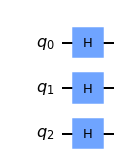

In [1]:
import numpy as np
from qiskit import *

qr=QuantumRegister(3,'q')
qc=QuantumCircuit(qr)

qc.h(range(3))

qc.draw('mpl')

In [2]:
# Show the result of Walsh-Hadamard transform
from qiskit.quantum_info import Statevector
psi=Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

## Remarks

1. Recalling that the Hadamard gate changes the basis set, from the computational basis to the $x$-basis.  The Walsh-Hadamard transformation is simply $|00 \cdots 00\rangle \Rightarrow |++ \cdots ++\rangle$.  Interestingly, the simple product of $|+\rangle$ corresponds to the superposition of integer states.  Quantum algorithms use this kind of *tricks* everywhere.

2. The Walsh-Hadamard transformation generates the superposition state where all terms have the same phase.  Applying phase shifting gates such as $Z$, $S$, $T$, and $P$, you can modify the phases. Quantum Fourier transform is an example.  See {numref}`sec-qft`.


---
Last modified on 07/23/2022.